In [1]:
import gym
import time
env = gym.make("FrozenLake-v1", render_mode='human')
env.reset()

env.render()

numberOfIterations=30

for i in range(numberOfIterations):
    random_action = env.action_space.sample()
    returnValue = env.step(random_action)
    env.render()

    print('Iteration {} and action {}'.format(i+1, random_action))
    time.sleep(2)
    if returnValue[2]:
        break

env.close()

d:\miniconda\envs\diffusion\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Iteration 1 and action 1
Iteration 2 and action 0


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gym 

desc = ["SFFF", "FFFF", "FFFF", "HFFG"]
env=gym.make('FrozenLake-v1', desc=desc, map_name="4x4", is_slippery=True, render_mode=None)
env.reset()
env.render()

env.close()

d:\miniconda\envs\diffusion\Lib\site-packages\gym\envs\toy_text\frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


In [2]:
env.action_space.n, env.observation_space.n

(4, 16)

In [3]:
# env.P[state][action]
env.P[0][1] # (transition prob, next state, reward, is terminal state?)

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False),
 (0.3333333333333333, 1, 0.0, False)]

In [2]:
# setup
discountRate = 0.9
# MC setup
numberEpisodes = 10000
# iterative value function evaluation (DP) setup
numberOfIterations = 1000
initPolicy = (1/env.action_space.n) * np.ones((env.observation_space.n, env.action_space.n))
valueFunctionVectorInitial=np.zeros(env.observation_space.n)
convergenceTolerance = 10**(-6)

## Policy Evaluation

In [5]:
# dynamic programming - estimate based on bellman equaton
def IterativeValueFunction(env, valueFunctionVector, numberIterations, policy, convergenceTolerance, discountRate=0.9):
    convergenceTrack = []
    for iterations in range(numberIterations):
        convergenceTrack.append(np.linalg.norm(valueFunctionVector, 2))
        valueFunctionVectorNextIteration = np.zeros(env.observation_space.n)
        # loop through every state
        for state in env.P:
            outerSum = 0
            # loop through each possible action in state
            for action in env.P[state]:
                innerSum = 0
                for prob, nextState, reward, isTerminalState in env.P[state][action]:
                    innerSum = innerSum + prob * (reward + discountRate*valueFunctionVector[nextState])
                outerSum=outerSum + policy[state, action]*innerSum
            valueFunctionVectorNextIteration[state] = outerSum

        if np.max(np.abs(valueFunctionVectorNextIteration - valueFunctionVector)) < convergenceTolerance:
            valueFunctionVector = valueFunctionVectorNextIteration
            break
        valueFunctionVector = valueFunctionVectorNextIteration

    return valueFunctionVector, convergenceTrack

In [6]:
valueFunctionVector, convergenceTrack = IterativeValueFunction(env, valueFunctionVector=valueFunctionVectorInitial, numberIterations=numberOfIterations, policy=initPolicy, convergenceTolerance=convergenceTolerance, discountRate=discountRate)

In [7]:
def grid_print(valueFunction, reshapeDim):
    ax = sns.heatmap(valueFunction.reshape(4, 4), annot=True, square=True, cbar=False, cmap='Blues', xticklabels=False, yticklabels=False)
    plt.show()

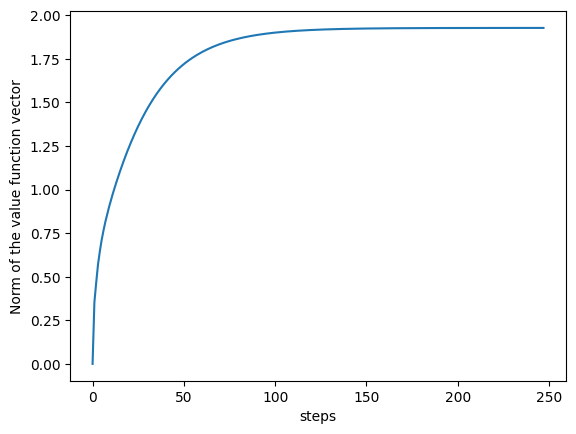

In [9]:
plt.plot(convergenceTrack)
plt.xlabel('steps')
plt.ylabel('Norm of the value function vector')
plt.show()

In [10]:
len(env.P), env.P

(16,
 {0: {0: [(0.3333333333333333, 0, 0.0, False),
    (0.3333333333333333, 0, 0.0, False),
    (0.3333333333333333, 4, 0.0, False)],
   1: [(0.3333333333333333, 0, 0.0, False),
    (0.3333333333333333, 4, 0.0, False),
    (0.3333333333333333, 1, 0.0, False)],
   2: [(0.3333333333333333, 4, 0.0, False),
    (0.3333333333333333, 1, 0.0, False),
    (0.3333333333333333, 0, 0.0, False)],
   3: [(0.3333333333333333, 1, 0.0, False),
    (0.3333333333333333, 0, 0.0, False),
    (0.3333333333333333, 0, 0.0, False)]},
  1: {0: [(0.3333333333333333, 1, 0.0, False),
    (0.3333333333333333, 0, 0.0, False),
    (0.3333333333333333, 5, 0.0, False)],
   1: [(0.3333333333333333, 0, 0.0, False),
    (0.3333333333333333, 5, 0.0, False),
    (0.3333333333333333, 2, 0.0, False)],
   2: [(0.3333333333333333, 5, 0.0, False),
    (0.3333333333333333, 2, 0.0, False),
    (0.3333333333333333, 1, 0.0, False)],
   3: [(0.3333333333333333, 2, 0.0, False),
    (0.3333333333333333, 1, 0.0, False),
    (0.3333333

## Compare with MC value function estimate

In [7]:
from mc_evaluation import MonteCarloStateValueFunction

In [12]:
env.observation_space.n, len(env.P)

(16, 16)

In [14]:
estimateValueFunctionVector = MonteCarloStateValueFunction(env, stateNumber=env.observation_space.n, episodes=numberEpisodes, discountRate=discountRate)

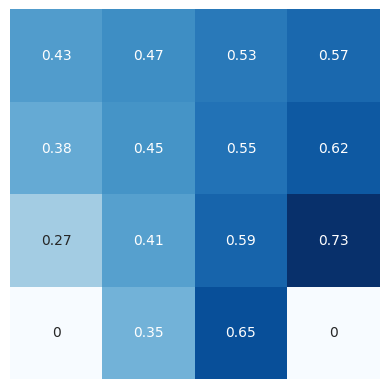

In [8]:
grid_print(valueFunctionVector, 4)

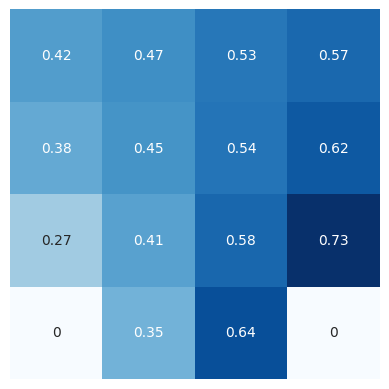

In [15]:
grid_print(estimateValueFunctionVector, 4)

## Policy Iteration

In [20]:
from policy_iteration import policyIteration

policyIteration(env, valueFunctionVectorInitial, initPolicy, numberOfIterations, numberOfIterations, convergenceTolerance, discountRate)

array([[0.  , 0.5 , 0.5 , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25]])

In [3]:
from policy_iteration import policyImprovement
from mc_evaluation import MonteCarloStateValueFunction

for iter in range(numberOfIterations):
    if iter == 0:
        currentPolicy = initPolicy
    
    estimateValueFunctionVector = MonteCarloStateValueFunction(env, stateNumber=env.observation_space.n, episodes=numberEpisodes, discountRate=discountRate)
    improvedPolicy,_ = policyImprovement(env, estimateValueFunctionVector, env.action_space.n, env.observation_space.n, discountRate)

    if np.allclose(currentPolicy, improvedPolicy):
        currentPolicy = improvedPolicy
        break
    currentPolicy = improvedPolicy

d:\miniconda\envs\diffusion\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
finalPolicy = np.argmax(currentPolicy, axis=1)
finalPolicy, currentPolicy

(array([1, 2, 2, 2, 1, 2, 2, 1, 3, 2, 2, 1, 0, 2, 2, 0], dtype=int64),
 array([[0.  , 0.5 , 0.5 , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 1.  , 0.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 1.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 1.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 1.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25]]))

In [7]:
# visualize MC policy
env=gym.make('FrozenLake-v1', desc=desc, map_name="4x4", is_slippery=False,render_mode='human')
(currentState,prob)=env.reset()
env.render()

# since the initial state is not a terminal state, set this flag to false
terminalState=False
for i in range(100):
    # here we step and return the state, reward, and boolean denoting if the state is a terminal state
    if not terminalState:
        (currentState, currentReward, terminalState,_,_) = env.step(int(finalPolicy[currentState]))
        
    else:
        break

env.close()

KeyboardInterrupt: 

## GLIE MC

In [8]:
from glie_mc import GLIEMonteCarlo

initialEpsilon = 0.2
finalPolicy, _ = GLIEMonteCarlo(env, numEpisodes=numberEpisodes, discountRate=discountRate, initialEpsilon=initialEpsilon)

KeyboardInterrupt: 

In [16]:
finalPolicy, _

(array([0., 1., 0., 0., 3., 1., 0., 1., 0., 3., 2., 2., 2., 1., 1., 0.]),
 array([[0.06858534, 0.0432761 , 0.01183445, 0.01865387],
        [0.01047929, 0.10856882, 0.00421961, 0.04796053],
        [0.13794384, 0.12514181, 0.00681232, 0.03303406],
        [0.14808564, 0.12064583, 0.02507753, 0.09725351],
        [0.01343108, 0.        , 0.01675613, 0.09157759],
        [0.0332081 , 0.14548795, 0.02779643, 0.08754932],
        [0.2156645 , 0.05465594, 0.16540142, 0.09662912],
        [0.2645331 , 0.38067324, 0.26472065, 0.10612832],
        [0.04190206, 0.00686737, 0.        , 0.        ],
        [0.14299201, 0.00492696, 0.        , 0.18529657],
        [0.        , 0.18239098, 0.42831358, 0.24936696],
        [0.        , 0.56083059, 0.63204335, 0.4275    ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.25230583, 0.        , 0.        ],
        [0.14050481, 0.58932751, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]

In [17]:
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode='human')
(currentState,prob)=env.reset()
env.render()

# since the initial state is not a terminal state, set this flag to false
terminalState=False
for i in range(100):
    # here we step and return the state, reward, and boolean denoting if the state is a terminal state
    if not terminalState:
        (currentState, currentReward, terminalState,_,_) = env.step(int(finalPolicy[currentState]))
        
    else:
        break

env.close()

d:\miniconda\envs\diffusion\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
